## Goal:
# Explore the Penguins dataset, clean data, perform analysis, and visualize results using NumPy, Pandas, Matplotlib, and Seaborn.
## 1. Why This Project?
 
1. Learn data cleaning with Pandas — handle missing values and correct data types.

2. Use NumPy for calculations — mean, median, and other statistics.

3. Visualize trends using Matplotlib and Seaborn — histograms, boxplots, pairplots, and heatmaps.

4. Understand relationships between species and features — body mass, flipper length, and sex.

## 2. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

## 3. Load Dataset

In [2]:
df = sns.load_dataset('penguins')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


## 4. Explore Data

In [3]:
print("Shape:", df.shape)
print(df.info())
print(df.isnull().sum())
print(df.describe())

Shape: (344, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB
None
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64
       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      342.000000     342.000000         342.000000   342.000000
mean        43.921930      17.151170         200.915205  4201.754386
st

### Insights:
 
1. 344 penguins, 7 features (species, island, bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g, sex).

2. Missing values exist in sex and some measurements.

3. Useful for both numerical and categorical analysis.

## 5. Data Cleaning

In [4]:
df['bill_length_mm'] = df['bill_length_mm'].fillna(df['bill_length_mm'].mean())

df['sex'] = df['sex'].fillna(df['sex'].mode()[0])

df = df.dropna(subset=['body_mass_g'])

### Insights:

1. Filling ensures numerical calculations and visualizations work.

2. Missing sex filled with most common value keeps categorical analysis consistent.

## 6. Analysis with NumPy & Pandas

# Average body mass

In [5]:
avg_body_mass = np.mean(df['body_mass_g'])
print("Average Body Mass:", avg_body_mass)

Average Body Mass: 4201.754385964912


# Average flipper length

In [6]:
avg_flipper = np.mean(df['flipper_length_mm'])
print("Average Flipper Length:", avg_flipper)

Average Flipper Length: 200.91520467836258


# Body mass by species

In [7]:
body_mass_species = df.groupby('species')['body_mass_g'].mean()
print("Average Body Mass by Species:\n", body_mass_species)

Average Body Mass by Species:
 species
Adelie       3700.662252
Chinstrap    3733.088235
Gentoo       5076.016260
Name: body_mass_g, dtype: float64


# Flipper length by species

In [8]:
flipper_species = df.groupby('species')['flipper_length_mm'].mean()
print("Average Flipper Length by Species:\n", flipper_species)

Average Flipper Length by Species:
 species
Adelie       189.953642
Chinstrap    195.823529
Gentoo       217.186992
Name: flipper_length_mm, dtype: float64


# Count by species

In [9]:
species_count = df['species'].value_counts()
print("Penguin Count by Species:\n", species_count)

Penguin Count by Species:
 species
Adelie       151
Gentoo       123
Chinstrap     68
Name: count, dtype: int64


### Insights:

1. Average body mass gives a general idea of penguin size (~4200 g).

2. Gentoo penguins are heaviest, Adelie lightest.

3. Flipper length correlates with body size.

## 7. Visualization with Matplotlib

# Bar chart of body mass by species

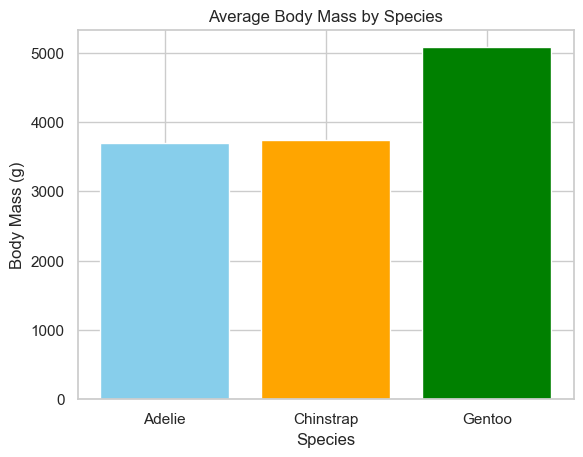

In [10]:
species = body_mass_species.index
mass = body_mass_species.values

plt.bar(species, mass, color=['skyblue','orange','green'])
plt.title("Average Body Mass by Species")
plt.xlabel("Species")
plt.ylabel("Body Mass (g)")
plt.show()

# Line plot of flipper length by species

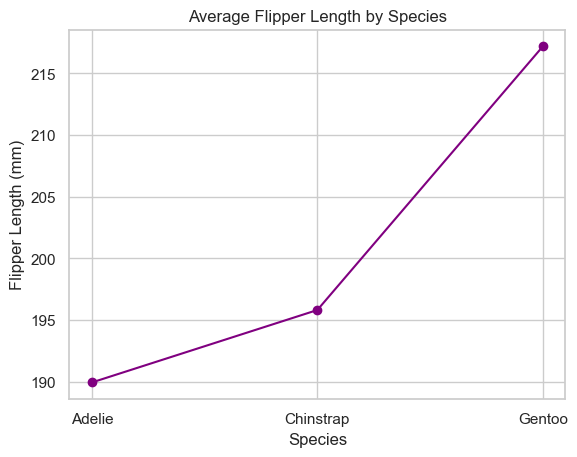

In [11]:
flipper = flipper_species.values

plt.plot(species, flipper, marker='o', color='purple')
plt.title("Average Flipper Length by Species")
plt.xlabel("Species")
plt.ylabel("Flipper Length (mm)")
plt.show()

### Insights:

1. Gentoo penguins are largest in both mass and flipper length.

2. Visualizations clearly differentiate species sizes.

## 8. Visualization with Seaborn

# Histogram of Body Mass

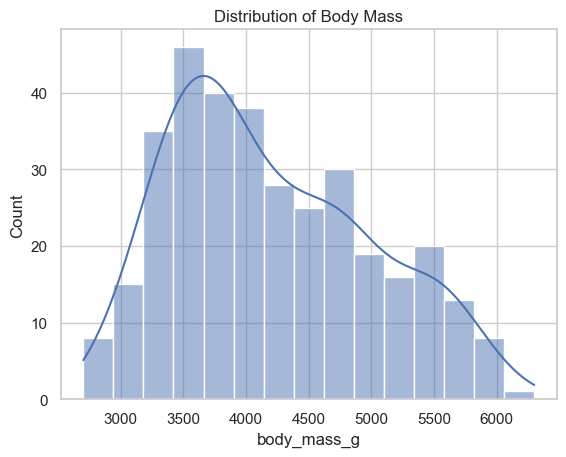

In [12]:
sns.histplot(df['body_mass_g'], bins=15, kde=True)
plt.title("Distribution of Body Mass")
plt.show()

# Countplot of Species

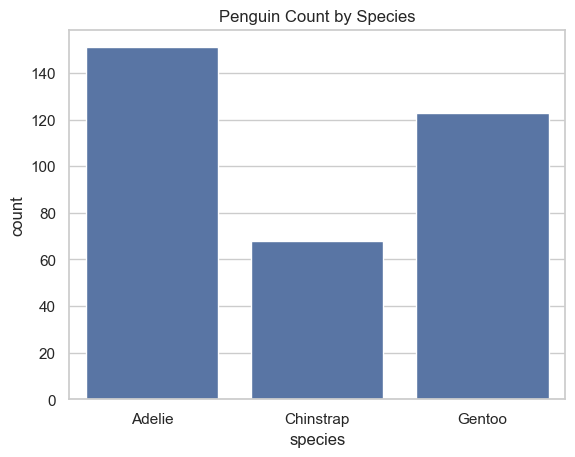

In [13]:
sns.countplot(x='species', data=df)
plt.title("Penguin Count by Species")
plt.show()

# Boxplot of Flipper Length by Species

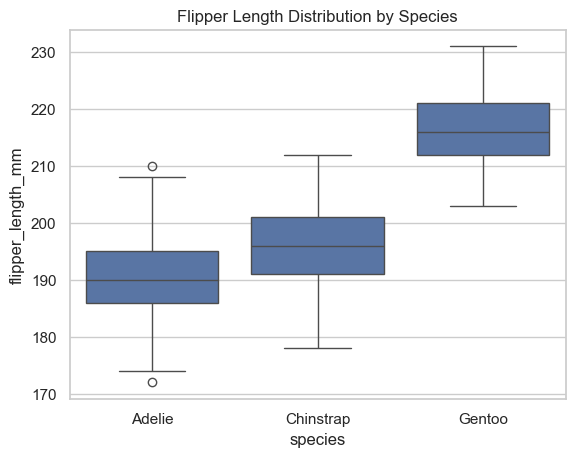

In [14]:
sns.boxplot(x='species', y='flipper_length_mm', data=df)
plt.title("Flipper Length Distribution by Species")
plt.show()

# Pairplot of numerical features with species hue

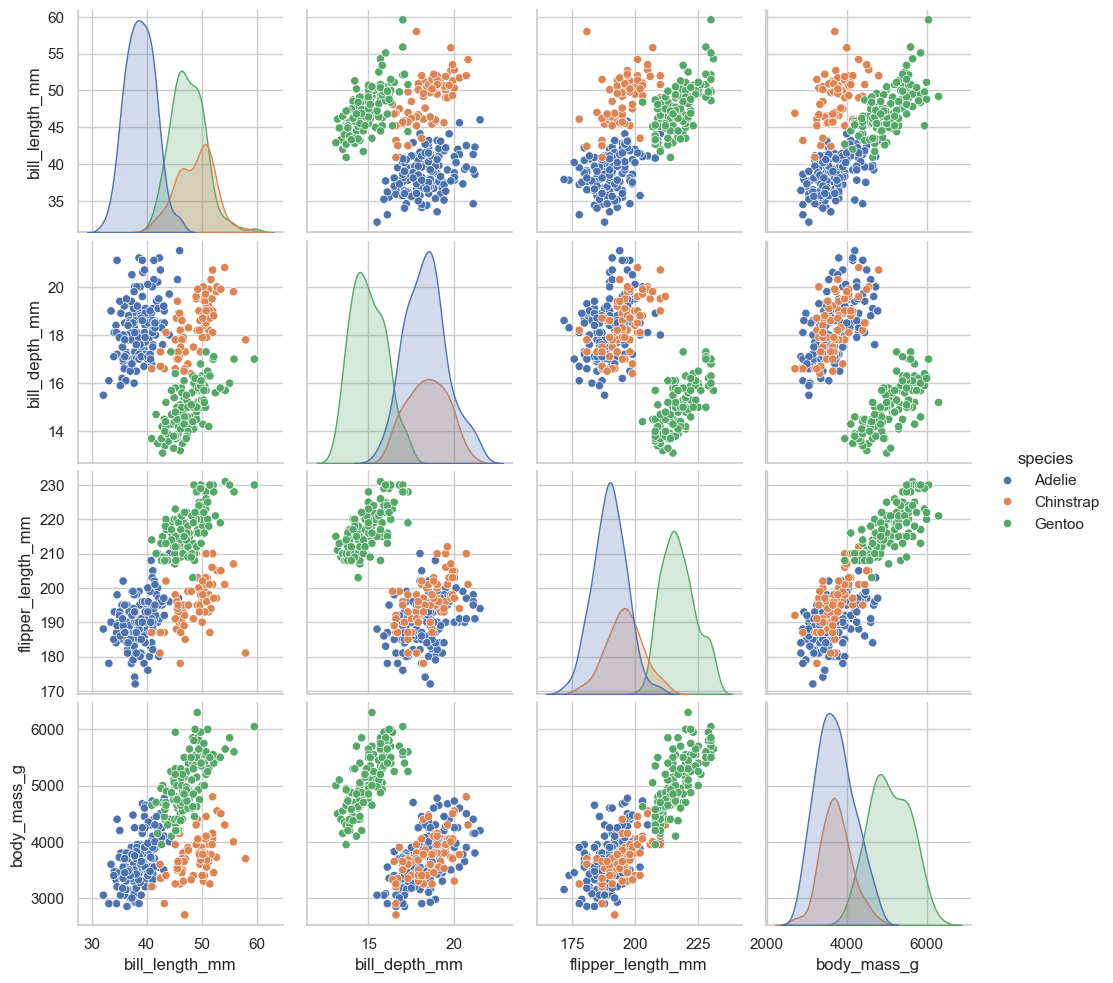

In [15]:
sns.pairplot(df[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g','species']], hue='species')
plt.show()

# Heatmap of correlation

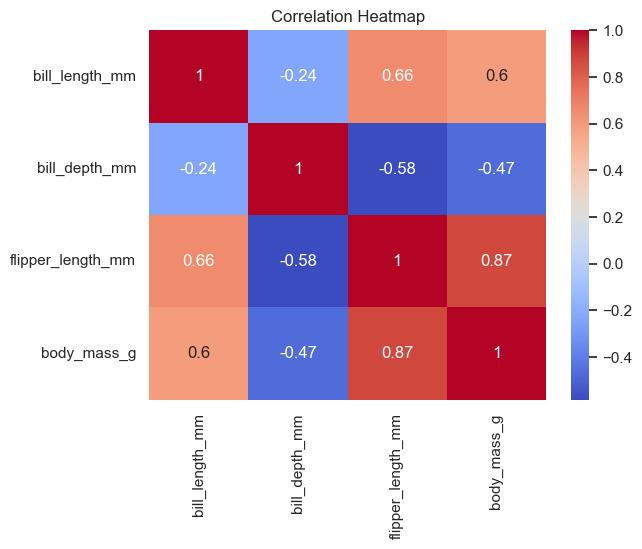

In [16]:
corr = df[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

### Insights:

1. Histogram: body mass mostly clustered around 3500–5000 g.

2. Countplot: Adelie and Gentoo are most common.

3. Boxplot: Gentoo have higher flipper lengths and body mass, Adelie lowest.

4. Pairplot: Strong positive correlation between flipper length and body mass.

5. Heatmap: Correlation between body mass and flipper length (~0.87) is strong.